## Background

Given the need to examine family-based vs population-based design, testing for genetic association with rare variants (allele) is crucial for genome wide association studies (GWAS). However, systemic differences between allele frequencies in subpopulations   remains a confounding variable  in case-control studies, where association could be found not by a disease associated marker but rather the underlying population structure. Employing a variant-set mixed model framework to allow for fixed and random effects, we are able to properly analyze  complex hierarchical data while accounting for population stratification and cryptic association. In order to mitigate this risk, we utilize a genome wide mixed model association test (GEMMA) to correct population structure and sample non-exchangeability and test multiple phenotypes. 

## Project Objective
The goal of this family based association study design is to utilize stimulation studies to analyze a family-based vs. population based design. Power is gained in analyzing families due to the effect variants that should be enrished within the family. However, correlation between family member limits the sample size of the study. Also, incomparison to population controls, controls within families allow them to be likely carriers of disease alleles which can decrease power.
We therefore look into different strategies to assess the trade-off:
1) Analyze families using LMM including both affected and unaffected individuals. We can either analyze all families, or analyze them separately and combine the outcome later. 

2) Analyze unrelated case control design of the same sample size and phenotypic model, and see how much larger the effect size have to be in families (in step 1), to offset the loss of power due to using related individuals, compared to unrelated design. 

3) Analyze affected individuals in the families but replaced the unaffected members with related controls from other families of the same structure, where no one is affected in their family. That is, the controls are still related, but perhaps no longer carrying a risk allele. 

4) Analyze affected family members and replaced the unaffected members with population-based controls. Here the controls are unrelated. 

5) Analyze a sample of unrelated individuals with the same number of affected and unaffected individuals as in analysis 1-3.

## Replication Objective

The goal of the replication is to verify the effect size of the association, compare relatedness of families, and ultimately confirm the genetic relatedness matrix results of the stimulated genetic relationship matrix (GRM), created by Joe Chase.
This file contains the percent of genetic material shared identically by descent by each selected individual in order to properly assess population stratification and cryptic relatedness. Utilizing known information on ancestor pedigrees, an estimated genetic relationship matrix is highly comparable for assessing phenotype similarity. Through understanding how this file was generated and replicating the results, we can assert the validity of the results and use the GRM as a base for future family-based association study design objectives where effect variants are enriched within families while maintaining a substantial sample size to work with.

We first simulate genetic data and pedigree with phenotypes for the creation of families of size eight (two parents, six children). Since the original data is in haplotype form, the data is summed and appropriately replaced with either a 0, 1, or 2 to match the respective genotype format. To mitigate population stratification, we employ the SMMATs framework for effective random fixed effects. This ensured the creation of effect variant families with non-identical siblings through ensuring optimal recombination rates and a high migration parameter between generated populations. In order to replicate this genotype on a large scale for approximately 12,000 individuals, we use to create a .bed, .bim. and .fam files to feed into PLINK for large scale haplotype reproduction for the individuals.

Families are created by assigning a parent's genome to each child while accounting for non-identical siblings through random sampling. In each subpopulation structure, the 20 founders' haplotypes are subsetted for each child creation, by which a new data frame of the complete family is created with each individual assigned a unique ID. To keep family size closer to reality, families are structured and filtered using census data on family household size.
Selected SNPs are assigned a specific non-zero effect size to assign phenotype values which are selected based on SNP value and assigned random familial and individual noise. We then generate both the continuous and binary phenotypes associated with each individual for the final selection of affected families with >= 2 individuals affected.

## Methods of verification

In order to verify these family creations for futher use in analyzing the different study designs, we must first check with multiple metrics to ensure genetic relationship matrix is accurate.
The following metrics to verify our stimuation are used:

1) SNP Pairwise Estimation: Create a genotype matrix for selected snps to check for correlation
- Run Pairwise estimation for snp square matrix to ensure SNPs are not correlated with each other and so therefore the estimated effeect size can be accepted.
- SNPs should have a diagnol correlation with itself on the matrix, that is a direct correlation of 1, while all other SNPs should have a correlation of 0.

2) Verify effect size for SNPs
- Compare 10 selected SNPs with no correlation to each other and verify effect size is desired effet size.

3) Compare Family Estimated Kingship Coefficient with pedigree matrix truth
- Using PLINK and KING, verify population percentages of estimates pair-wise kinship coefficients

4) GWAS Manhattan and Quantile-Quantile (QQ) plot
- Compare effect size of SNPs and verify significant P values

### Method Verification: 1) SNP Pairwise Estimation: Create a genotype matrix for selected snps to check for correlation

In population-based and family genetics, linkage disequilibrium (LD) refers to the non-random association of alleles at different loci  in the population of interest. When loci are in linkage disequilibrium the frequency of association of their haplotypes is higher or lower than the expected value if loci were independent and associated randomly. Linkage disequilibrium can be influenced by a multitude of factors, including gene recombination rate, and population stratification. Therefore, population linkage disequilibrium outlines serve to identify the genetic processes responsible for its structure.

 The linkage disequilibrium score (LD) serves to quantify the separate contributions of multi gene inheritance effects and various confounding factors, such as population stratification or cryptic relatedness in GWAS studies. The score is based on a linear regression analysis examining the sum of the coefficient of determination, otherwise known as the R2, between each SNP with all other SNPs in the study. 

We assess LD in our simulation by assessing the LD score for the 100 snps assigned non-zero log ratio effects (log 1.5 for 60 and log 0.5 for 40). We stimulate this process via PLINK’s --ld-snp-list <filename> command and feed in the SNPs effect file. By filtering out selected SNPs with non-zero effects, we have a file containing the R2 for only the selected SNPs.

In [1]:
library(magrittr)
library(dplyr)   
library(data.table)
library(tidyverse)
sel_snp_corr<- fread("sel_snp_cor.txt")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


── Attaching packages ──────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.4.0     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ tidyr::extract()      masks magrittr::extract()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ dplyr::lag()          masks stats::lag()
✖ data.table::last()    masks dplyr::last()
✖ purrr::set_names()    masks m


The downloaded binary packages are in
	/var/folders/gl/7vjrd5hx6rs6y0v55jzsw38c0000gn/T//RtmpM7ftUA/downloaded_packages


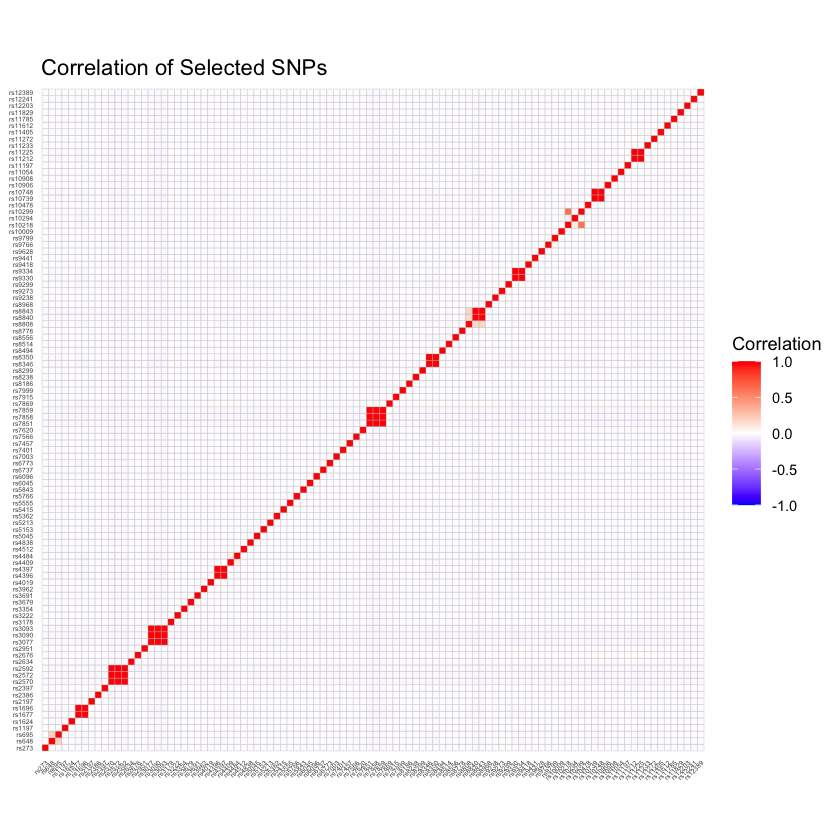

In [18]:
install.packages("ggcorrplot")
library(ggcorrplot)

# creating square SNP matrix 
valnames<-unique(sel_snp_corr$SNP_A)
myMat <- matrix(0, length(valnames), length(valnames), dimnames = list(valnames, valnames))
merge_snps<- sel_snp_corr %>% select(3,6)
myMat[as.matrix(merge_snps)] <- sel_snp_corr[["R2"]]

corr <- cor(myMat)
ggcorrplot(corr, title = "Correlation of Selected SNPs", legend.title = "Correlation", tl.cex = 4)+ 
  ggplot2::labs(x = 'SNPs', y = 'SNPs')




As can be seen by the correlation_of_snp_graph.pdf, each SNP is in perfect correlation with itself while having 0 correlation with other SNPs. Only a few SNPs have high LD. This pattern allows us to further verify and estimate the true effect size of each SNP not in high LD with each other. From this visual, we are now able to assess whether the SNP effect size is the desired effect size after noise is applied and as well as determine which snps have an inflated effect size, which we can attribute to high LD. 

These clusters are also expected as in a normal simulation, there will be correlation between SNPS that are close together. 

In [53]:
#Loading in file with all SNP effect size
assoc<- fread("new_six_fam_eff.assoc.txt")

snps_af<- fread("snps_af")
my_snps<- fread("snp_eff.txt")

snps <- snps_af$V1

# Filter and save 100 non-zero effect size snps and 
eff_comparison <- assoc %>% filter(rs %in% snps)

# Filter by SNP ID and effect size only (beta)
eff_comparison<- subset(eff_comparison, select=c("rs","beta"))

# Add side by side comparison of actual effect size before added noise
eff_comparison$effect_size <- my_snps$V2

# Compare absolute difference
eff_comparison$abs_diff <- abs(eff_comparison$beta - eff_comparison$effect_size)

summary(eff_comparison$abs_diff)

eff_comparison

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0004663 0.1711381 0.4664881 0.6330965 1.0006535 2.2216851 

rs,beta,effect_size,abs_diff
<chr>,<dbl>,<dbl>,<dbl>
rs273,0.5372926,0.4054651,0.13182749
rs648,-0.4799685,0.4054651,0.88543361
rs695,-0.8914401,0.4054651,1.29690521
rs1197,0.3508377,0.4054651,0.05462741
rs1624,0.2710461,0.4054651,0.13441901
rs1677,0.6371618,0.4054651,0.23169669
rs1696,0.6410063,0.4054651,0.23554119
rs2197,0.1965870,0.4054651,0.20887811
rs2386,0.2872277,0.4054651,0.11823741


This outfile contains all selected SNPs correlation with each other SNP. We select SNPs for verification of effect size by filtering out 10 SNPs with an association of less than 10%

In [51]:
# Select 10 SNPS NOT in correlation with one alother. These SNPs have a correlation
# with any other SNP larger than 10%, based on R2 value
ten_snp_effect_size <- eff_comparison[c(28,29,30,31,32,33,34,35,36,37)]
ten_snp_effect_size

rs,beta,effect_size,abs_diff
<chr>,<dbl>,<dbl>,<dbl>
rs4397,0.7651893,0.4054651,0.35972419
rs4409,0.4250199,0.4054651,0.01955479
rs4484,0.5242188,0.4054651,0.11875369
rs4512,0.3059095,0.4054651,0.09955561
rs4838,0.4928891,0.4054651,0.08742399
rs5045,0.1004699,0.4054651,0.30499521
rs5153,0.3049812,0.4054651,0.10048391
rs5213,0.2848969,0.4054651,0.12056821
rs5362,0.1519100,0.4054651,0.25355511


In [49]:
########### Calculating 95% CI for each selected ten SNP effect size #########

sel_snps<- subset(ten_snp_effect_size, rs==rs,select=c(beta, effect_size))

# snp_1 beta value and true size
snp_1<- c(sel_snps[1,])
snp_1_eff<- c(snp_1[[1]],snp_1[[2]])
# calculate mean 
mean_1<- mean(snp_1_eff)
# calculate sd 
sd_1<-sd(snp_1_eff)
# calculate error 
error_1 <- qnorm(0.975) * sd_1/sqrt(2)
# calculate confidence level 
ub_1<- mean_1+error_1
lb_1<- mean_1-error_1

# snp_2 beta value and true size
snp_2<- c(sel_snps[2,])
print(snp_2)
snp_2_eff<- c(snp_2[[1]],snp_2[[2]])
# calculate mean 
mean_2<- mean(snp_2_eff)
# calculate sd 
sd_2<-sd(snp_2_eff)
# calculate error 
error_2 <- qnorm(0.975) * sd_2/sqrt(2)
# calculate confidence level 
ub_2<- mean_2+error_2
lb_2<- mean_2-error_2

# snp_3 beta value and true size
snp_3<- c(sel_snps[3,])
snp_3_eff<- c(snp_3[[1]],snp_3[[2]])
# calculate mean 
mean_3<- mean(snp_3_eff)
# calculate sd 
sd_3<-sd(snp_3_eff)
# calculate error 
error_3 <- qnorm(0.975) * sd_3/sqrt(2)
# calculate confidence level 
ub_3<- mean_3+error_3
lb_3<- mean_3-error_3

# snp_4 beta value and true size
snp_4<- c(sel_snps[4,])
snp_4_eff<- c(snp_4[[1]],snp_4[[2]])
# calculate mean 
mean_4<- mean(snp_4_eff)
# calculate sd 
sd_4<-sd(snp_4_eff)
# calculate error 
error_4 <- qnorm(0.975) * sd_4/sqrt(2)
# calculate confidence level 
ub_4<- mean_4+error_4
lb_4<- mean_4-error_4

# snp_5 beta value and true size
snp_5<- c(sel_snps[5,])
snp_5_eff<- c(snp_5[[1]],snp_5[[2]])
# calculate mean 
mean_5<- mean(snp_5_eff)
# calculate sd 
sd_5<-sd(snp_5_eff)
# calculate error 
error_5 <- qnorm(0.975) * sd_5/sqrt(2)
# calculate confidence level 
ub_5<- mean_5+error_5
lb_5<- mean_5-error_5

# snp_6 beta value and true size
snp_6<- c(sel_snps[6,])
snp_6_eff<- c(snp_6[[1]],snp_6[[2]])
# calculate mean 
mean_6<- mean(snp_6_eff)
# calculate sd 
sd_6<-sd(snp_6_eff)
# calculate error 
error_6 <- qnorm(0.975) * sd_6/sqrt(2)
# calculate confidence level 
ub_6<- mean_6+error_6
lb_6<- mean_6-error_6

# snp_7 beta value and true size
snp_7<- c(sel_snps[7,])
snp_7_eff<- c(snp_7[[1]],snp_7[[2]])
# calculate mean 
mean_7<- mean(snp_7_eff)
# calculate sd 
sd_7<-sd(snp_7_eff)
# calculate error 
error_7 <- qnorm(0.975) * sd_7/sqrt(2)
# calculate confidence level 
ub_7<- mean_7+error_7
lb_7<- mean_7-error_7

# snp_8 beta value and true size
snp_8<- c(sel_snps[8,])
snp_8_eff<- c(snp_8[[1]],snp_8[[2]])
# calculate mean 
mean_8<- mean(snp_8_eff)
# calculate sd 
sd_8<-sd(snp_8_eff)
# calculate error 
error_8 <- qnorm(0.975) * sd_8/sqrt(2)
# calculate confidence level 
ub_8<- mean_8+error_8
lb_8<- mean_8-error_8

# snp_7 beta value and true size
snp_9<- c(sel_snps[9,])
snp_9_eff<- c(snp_9[[1]],snp_9[[2]])
# calculate mean 
mean_9<- mean(snp_9_eff)
# calculate sd 
sd_9<-sd(snp_9_eff)
# calculate error 
error_9 <- qnorm(0.975) * sd_9/sqrt(2)
# calculate confidence level 
ub_9<- mean_9+error_9
lb_9<- mean_9-error_9


# snp_10 beta value and true size
snp_10<- c(sel_snps[10,])
snp_10_eff<- c(snp_10[[1]],snp_10[[2]])
# calculate mean 
mean_10<- mean(snp_10_eff)
# calculate sd 
sd_10<-sd(snp_10_eff)
# calculate error 
error_10 <- qnorm(0.975) * sd_10/sqrt(2)
# calculate confidence level 
ub_10<- mean_10+error_10
lb_10<- mean_10-error_10

# adding upper bound and lower bound columns to sel_snp data frame

ten_snp_effect_size$upper_bound<- cbind(ub_1,ub_2,ub_3,ub_4,ub_5,ub_6,ub_7,ub_8,ub_9,ub_10)
ten_snp_effect_size$lower_bound<- cbind(lb_1,lb_2,lb_3,lb_4,lb_5,lb_6,lb_7,lb_8,lb_9,lb_10)

$beta
[1] 0.4250199

$effect_size
[1] 0.4054651



Warning message in set(x, j = name, value = value):
“10 column matrix RHS of := will be treated as one vector”
Warning message in set(x, j = name, value = value):
“10 column matrix RHS of := will be treated as one vector”


Next, we plot our confidence intervals for the SNP log odds ratio estimate (beta). The dashed red nigh signifies the true log odds ratio before noise is applied. 

Warning message:
“Duplicated aesthetics after name standardisation: linetype”


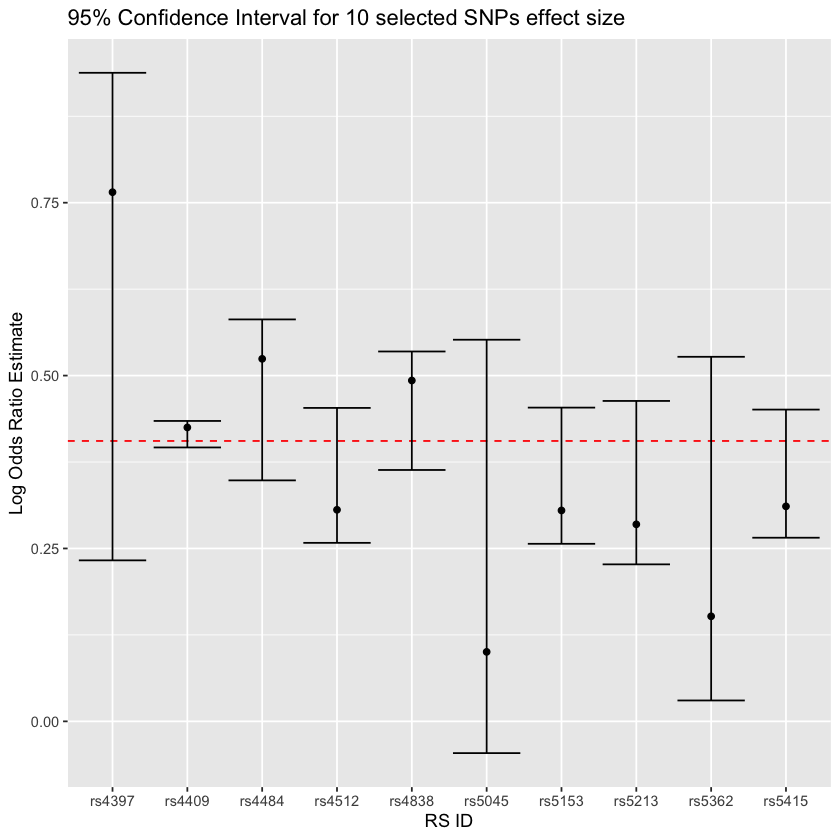

In [50]:
# plotting confidence intervals for selected snps effect size 

ggplot(ten_snp_effect_size, aes(x=rs, y=beta))+
  ggtitle("95% Confidence Interval for 10 selected SNPs effect size")+
  geom_hline(aes(yintercept=0.4054651), linetype="dashed", color = "red", lty="boo")+
  scale_linetype_manual(name = "True effect size")+
  geom_errorbar(aes(ymin=lower_bound,ymax=upper_bound))+
  labs(y= "Log Odds Ratio Estimate", x = "RS ID", size= 19)+
  geom_point()

As can be seen, all SNP beta values fall between the calculated upper and lower bounds. 

## Method Verification 3) Compare Family Estimated Kingship Coefficient with pedigree 

From the creation of families after added effects and genotype stimulation, family pedigree is expected to be in line with the true values. For this estimation, we can use the kinship coefficient to estimate how similar two individuals are based on varients. We can utilize PLINK's __pairwise IDB estimation__ and KING's __kingship estimation__ as two different to verify the estimated relationship. 

For an estimation of the relationship ranges, we use the following metrics provided by KING's documentation:

"An estimated kinship coefficient range >0.354, [0.177, 0.354], [0.0884, 0.177] and [0.0442, 0.0884] corresponds to duplicate/MZ twin, 1st-degree, 2nd-degree, and 3rd-degree relationships respectively."

We first estimate the kinship for the founder population, by which should have a kinship less than 0.177

In [56]:
kinship<- fread("plink_files/king.kin")
kin_founders <- kinship %>% filter(Kinship < 0.177)
kin_founders

FID,ID1,ID2,N_SNP,Z0,Phi,HetHet,IBS0,HetConc,HomIBS0,Kinship,Error
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,id_3_1,id_4_1,12500,1,0,0.0319,0.0202,0.1911,0.5260,-0.0430,0.0
5,id_9_1,id_10_1,12500,1,0,0.0331,0.0202,0.1896,0.5260,-0.0354,0.0
7,id_13_1,id_14_1,12500,1,0,0.0330,0.0197,0.1965,0.5359,-0.0319,0.0
10,id_19_1,id_20_1,12500,1,0,0.0404,0.0129,0.2275,0.3985,0.0672,1.0
12,id_3_2,id_4_2,12500,1,0,0.0319,0.0150,0.1741,0.4244,0.0085,0.0
17,id_13_2,id_14_2,12500,1,0,0.0323,0.0177,0.1920,0.4955,-0.0152,0.0
19,id_17_2,id_18_2,12500,1,0,0.0302,0.0180,0.1773,0.5034,-0.0287,0.0
20,id_19_2,id_20_2,12500,1,0,0.0361,0.0150,0.2079,0.4808,0.0286,0.5
24,id_7_3,id_8_3,12500,1,0,0.0338,0.0161,0.1936,0.4313,0.0081,0.0


In [78]:
est_kinship<- kinship[,c("FID","ID1","ID2","Kinship")]

list1<- rep(0.25, 27)
list2<- c(0, list1)
list3<- rep(list2,length(unique(est_kinship$FID)))
est_kinship$True_Kinship<-list3

founders <- est_kinship %>% filter(Kinship < 0.177)

# calulating mean and varience for founder population
mean(founders$Kinship)
var(founders$Kinship)

founders

[1] 0.0001022634

[1] 0.001776236

FID,ID1,ID2,Kinship,True_Kinship
<int>,<chr>,<chr>,<dbl>,<dbl>
2,id_3_1,id_4_1,-0.0430,0
5,id_9_1,id_10_1,-0.0354,0
7,id_13_1,id_14_1,-0.0319,0
10,id_19_1,id_20_1,0.0672,0
12,id_3_2,id_4_2,0.0085,0
17,id_13_2,id_14_2,-0.0152,0
19,id_17_2,id_18_2,-0.0287,0
20,id_19_2,id_20_2,0.0286,0
24,id_7_3,id_8_3,0.0081,0


In [97]:
kin_siblings <- kinship %>% filter(Kinship < 0.354 & Kinship > 0.178)
kin_siblings

FID,ID1,ID2,N_SNP,Z0,Phi,HetHet,IBS0,HetConc,HomIBS0,Kinship,Error
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,id_3_1,id_22_1,12500,1,0,0.0475,0.0000,0.3035,0.0000,0.2328,1
2,id_3_1,id_32_1,12500,1,0,0.0497,0.0000,0.3190,0.0000,0.2418,1
2,id_3_1,id_42_1,12500,1,0,0.0494,0.0000,0.3249,0.0000,0.2452,1
2,id_3_1,id_52_1,12500,1,0,0.0496,0.0000,0.3157,0.0000,0.2399,1
2,id_3_1,id_62_1,12500,1,0,0.0503,0.0000,0.3279,0.0000,0.2470,1
2,id_3_1,id_72_1,12500,1,0,0.0438,0.0000,0.2817,0.0000,0.2198,1
2,id_4_1,id_22_1,12500,1,0,0.0515,0.0000,0.3411,0.0000,0.2543,1
2,id_4_1,id_32_1,12500,1,0,0.0507,0.0000,0.3311,0.0000,0.2487,1
2,id_4_1,id_42_1,12500,1,0,0.0469,0.0000,0.3066,0.0000,0.2347,1


In [102]:
par_child_siblings <- est_kinship %>% filter(Kinship < 0.354 & Kinship > 0.178) 
par_child_siblings

FID,ID1,ID2,Kinship,True_Kinship
<int>,<chr>,<chr>,<dbl>,<dbl>
2,id_3_1,id_22_1,0.2328,0.25
2,id_3_1,id_32_1,0.2418,0.25
2,id_3_1,id_42_1,0.2452,0.25
2,id_3_1,id_52_1,0.2399,0.25
2,id_3_1,id_62_1,0.2470,0.25
2,id_3_1,id_72_1,0.2198,0.25
2,id_4_1,id_22_1,0.2543,0.25
2,id_4_1,id_32_1,0.2487,0.25
2,id_4_1,id_42_1,0.2347,0.25


There are 487 founding pairs and 12,837 parent-child and sibling-sibling relationships. However, there are 467 families selected. We have a difference of 10 misclassified founders, and therefore an underrepresentation of the kinship coefficient.

What could explain this?

1) These founders have high heterozygosity values, meaning high genetic variability.

In [79]:
not_founders <- founders %>% filter(True_Kinship != 0.00)
not_founders

FID,ID1,ID2,Kinship,True_Kinship
<int>,<chr>,<chr>,<dbl>,<dbl>
335,id_25_34,id_35_34,0.1687,0.25
335,id_25_34,id_65_34,0.1727,0.25
335,id_45_34,id_65_34,0.1621,0.25
340,id_40_34,id_60_34,0.1701,0.25
340,id_60_34,id_70_34,0.1757,0.25
1138,id_28_114,id_58_114,0.1727,0.25
1138,id_48_114,id_68_114,0.1758,0.25
1254,id_44_126,id_64_126,0.1670,0.25
1499,id_29_150,id_79_150,0.1754,0.25


In [81]:
# Filtering out HetHet value for not_founders population misclassified as founders

not_founders_het <- kinship %>% filter(ID1 %in% not_founders$ID1)
not_founders_het <- not_founders_het %>% filter(ID2 %in% not_founders$ID2)
not_founders_het <- not_founders_het %>% filter(Kinship %in% not_founders$Kinship)
not_founders_het

FID,ID1,ID2,N_SNP,Z0,Phi,HetHet,IBS0,HetConc,HomIBS0,Kinship,Error
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
335,id_25_34,id_35_34,12500,1,0,0.0606,0.0140,0.4574,0.4060,0.1687,1
335,id_25_34,id_65_34,12500,1,0,0.0590,0.0134,0.4610,0.3875,0.1727,1
335,id_45_34,id_65_34,12500,1,0,0.0594,0.0144,0.4594,0.3913,0.1621,1
340,id_40_34,id_60_34,12500,1,0,0.0582,0.0134,0.4625,0.4308,0.1701,1
340,id_60_34,id_70_34,12500,1,0,0.0582,0.0131,0.4700,0.4121,0.1757,1
1138,id_28_114,id_58_114,12500,1,0,0.0583,0.0128,0.4448,0.4051,0.1727,1
1138,id_48_114,id_68_114,12500,1,0,0.0617,0.0137,0.4620,0.4052,0.1758,1
1254,id_44_126,id_64_126,12500,1,0,0.0580,0.0130,0.4357,0.4201,0.1670,1
1499,id_29_150,id_79_150,12500,1,0,0.0564,0.0119,0.4365,0.3772,0.1754,1


In [93]:
rounded_founder_het<- round(kin_founders$HetHet,2)
mean(rounded_founder_het)

[1] 0.03304527

In [83]:
rounded_not_founder_het <- round(not_founders_het$HetHet,2)
mean(rounded_not_founder_het)

[1] 0.06

We can see that these "not founders" do have a high heterozygosity value in comparison to those falsely classified as founders.

What could explain this?

2) I am being very generous with my threshold of less than 0.177. 

What if we modified the threshold to more accurately reflect a low 0 degree of relatedness? Let us use less than 0.15.

first degree |  founders and zero degree - two by teo 

In [95]:
founders <- est_kinship %>% filter(Kinship < 0.150)
founders

FID,ID1,ID2,Kinship,True_Kinship
<int>,<chr>,<chr>,<dbl>,<dbl>
2,id_3_1,id_4_1,-0.0430,0
5,id_9_1,id_10_1,-0.0354,0
7,id_13_1,id_14_1,-0.0319,0
10,id_19_1,id_20_1,0.0672,0
12,id_3_2,id_4_2,0.0085,0
17,id_13_2,id_14_2,-0.0152,0
19,id_17_2,id_18_2,-0.0287,0
20,id_19_2,id_20_2,0.0286,0
24,id_7_3,id_8_3,0.0081,0


In [110]:
mean(founders$Kinship)
var(founders$Kinship)

[1] -0.003486975

[1] 0.00118585

In [99]:
par_child_siblings<- est_kinship %>% filter(Kinship < 0.354 & Kinship > 0.151) 
par_child_siblings

FID,ID1,ID2,Kinship,True_Kinship
<int>,<chr>,<chr>,<dbl>,<dbl>
2,id_3_1,id_22_1,0.2328,0.25
2,id_3_1,id_32_1,0.2418,0.25
2,id_3_1,id_42_1,0.2452,0.25
2,id_3_1,id_52_1,0.2399,0.25
2,id_3_1,id_62_1,0.2470,0.25
2,id_3_1,id_72_1,0.2198,0.25
2,id_4_1,id_22_1,0.2543,0.25
2,id_4_1,id_32_1,0.2487,0.25
2,id_4_1,id_42_1,0.2347,0.25


In [108]:
mean(par_child_siblings$Kinship)
var(par_child_siblings$Kinship)

[1] 0.253764

[1] 0.0004091375

In [100]:
missing_sibs_or <- kinship %>% filter(Kinship > 0.354)
missing_sibs_or

FID,ID1,ID2,N_SNP,Z0,Phi,HetHet,IBS0,HetConc,HomIBS0,Kinship,Error
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Desired response = Success! 
The correct number of entries for both founders and parent-child & sibling-sibling relationship.

Indicates three things: 
- no twins
- no repeated samples
- founders assigned as founders in the original script are indeed founders based on Kinship
- first degree
- accurate proportion number of first-generation pairwise kinship coefficients

4) GWAS Manhattan and Quantile-Quantile (QQ) plot
- Compare effect size of SNPs and verify significant P values

# QQ Plot 

A QQ plot 

[1] "chr"     "rs"      "ps"      "n_miss"  "allele1" "allele0" "af"     
 [8] "beta"    "se"      "logl_H1" "l_remle" "l_mle"   "p_wald"  "p_lrt"  
[15] "p_score"

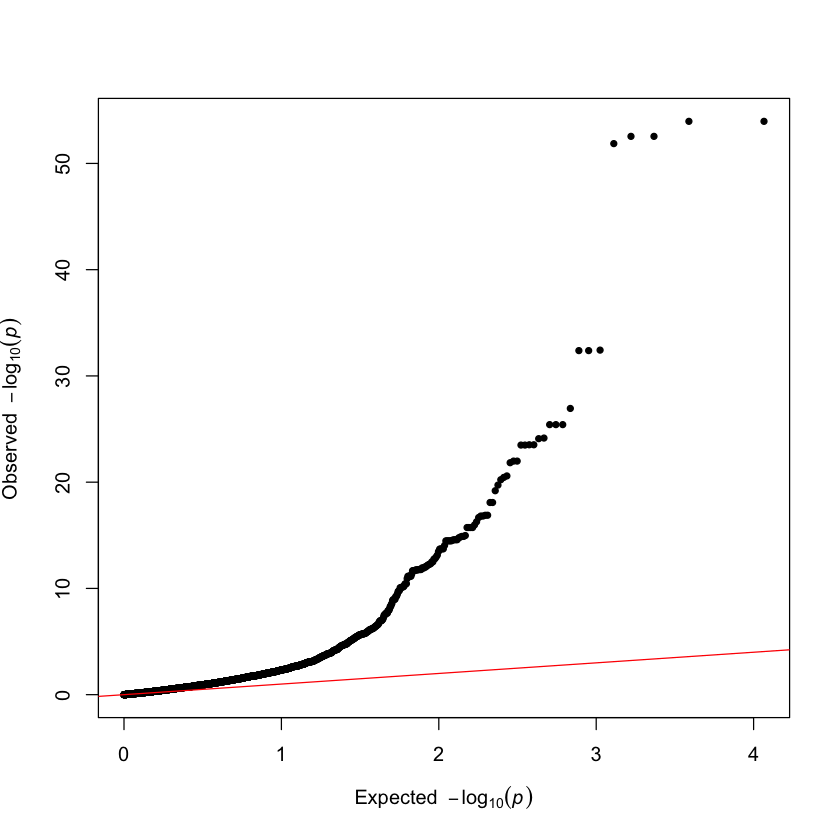

In [105]:
library(qqman)
gm<- fread("new_six_fam_eff.assoc.txt") %>% as_tibble()
my_snps <- fread("snp_eff.txt")

qq(gm$p_wald)
names(gm)

From this QQ plot, we can see the non zero effects are influencing the trend of the graph. The expected p-value would be 0 if there was not an effect, denoted by the red line. 

Given the trend of the graph, the plot communicated some SNPs have effects because the observed p-value is different than the expected one. 

 # GWAS Manhattan Plot

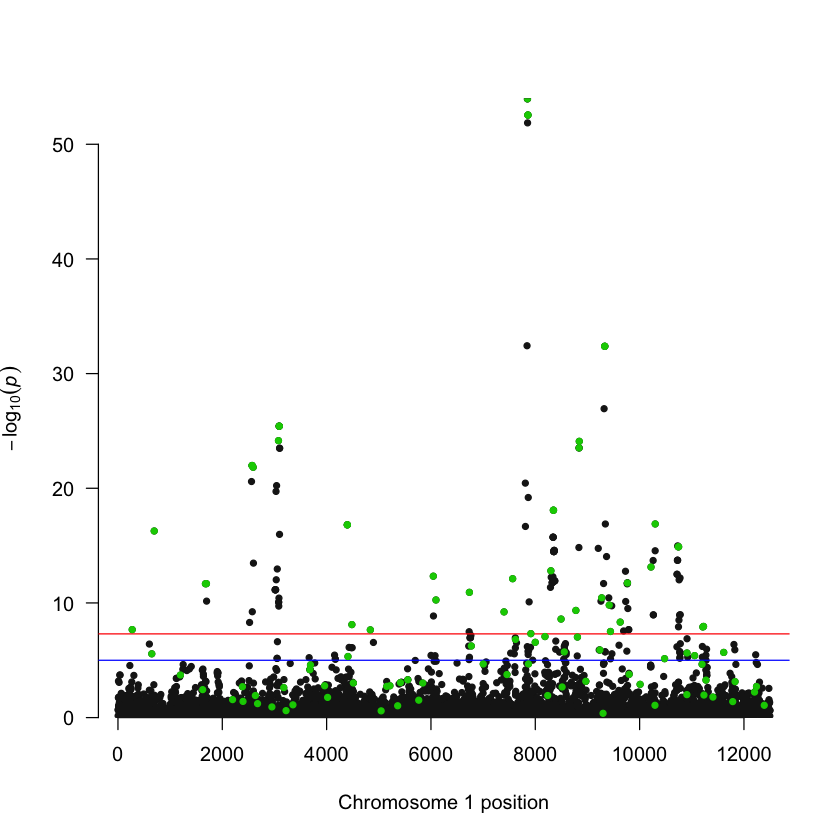

In [112]:
manhattan(gm, chr = "chr", bp = "ps", p = "p_wald", snp = "rs", highlight = my_snps$V1)

In [ ]:
If these markers are in HWE for the individual you would use only the founders

